In [1]:
import matplotlib.pyplot as plt

from helpers import find_max_subpixel, get_diffusion_coefficient, get_particle_radius, estimate_diffusion_msd_fit, \
    generate_kymograph, find_max_subpixel, load_challenge_data, load_challenge_data_multiple_particles

Estimated Diffusion Coefficient: -0.2808 µm²/ms
Estimated Particle Radius: -0.874 nm
True Diffusion Coefficient: 0.0491 µm²/ms
True Particle Radius: 5.000 nm


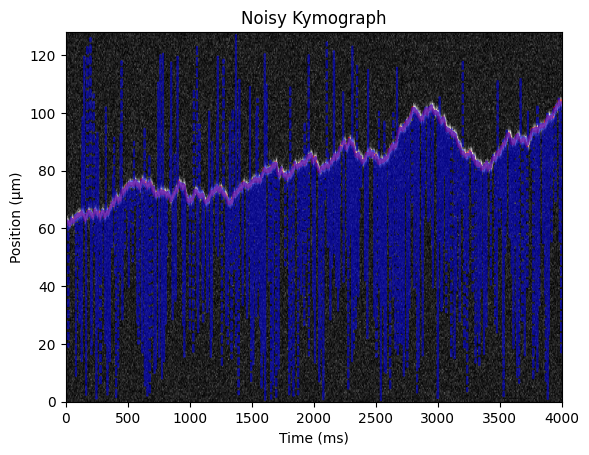

C:\Users\jonathan.derix\AppData\Local\Temp\ipykernel_36836\2545847283.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


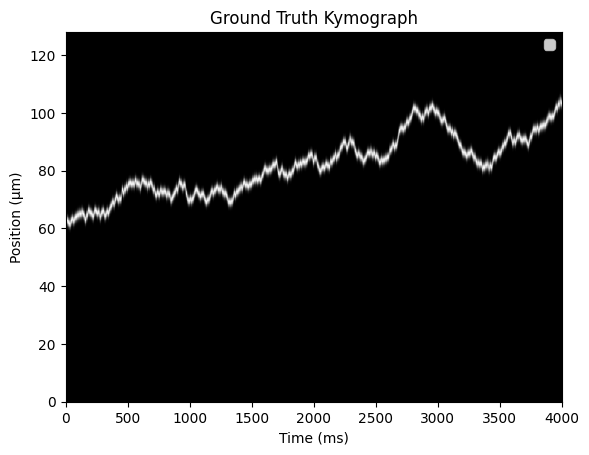

In [2]:
particle_size = 5  # in nm
diffusion_coefficient = get_diffusion_coefficient(particle_size)
x_step = 0.5 # each sample is 0.5µm. This is determined by the microscope pixel size and magnification
t_step = 1.0 # each time step is 1ms. This is determined by the camera frame rate
kymograph_noisy, kymograph_gt, true_path = generate_kymograph(length=4000, width=256, 
                                                              diffusion=diffusion_coefficient, 
                                                              contrast = 1,
                                                              noise_level=0.3, 
                                                              peak_width=1, dx=x_step, dt=t_step)

estimated_path = find_max_subpixel(kymograph_noisy) # second dumbest way to estimate path. I should at least have smoothend the data. Your task is to replace this with something smarter!

estimated_diffusion = estimate_diffusion_msd_fit(estimated_path, dx=x_step, dt=t_step)
estimated_radius = get_particle_radius(estimated_diffusion)

print(f"Estimated Diffusion Coefficient: {estimated_diffusion:.4f} µm²/ms")
print(f"Estimated Particle Radius: {estimated_radius:.3f} nm") # almost certainly wrong due to dumb path estimation
print(f"True Diffusion Coefficient: {diffusion_coefficient:.4f} µm²/ms")
print(f"True Particle Radius: {particle_size:.3f} nm")

plt.imshow(kymograph_noisy.T, cmap='gray', aspect='auto', extent=[0, kymograph_noisy.shape[0]*t_step, 0, kymograph_noisy.shape[1]*x_step], origin='lower')
plt.plot(true_path[0] * x_step, color='red', label='True Path', alpha=0.5)
plt.plot(estimated_path * x_step, color='blue', linestyle='--', label='Estimated Path', alpha=0.5) # extremely noisy estimate
plt.xlabel('Time (ms)')
plt.ylabel('Position (µm)')
plt.title('Noisy Kymograph')
plt.show()
plt.imshow(kymograph_gt.T, cmap='gray', aspect='auto', extent=[0, kymograph_gt.shape[0]*t_step, 0, kymograph_gt.shape[1]*x_step], origin='lower')
plt.xlabel('Time (ms)')
plt.ylabel('Position (µm)')
plt.title('Ground Truth Kymograph')
plt.legend()
plt.show()

Estimated particle radius 1: ??? nm
Estimated particle radius 2: ??? nm


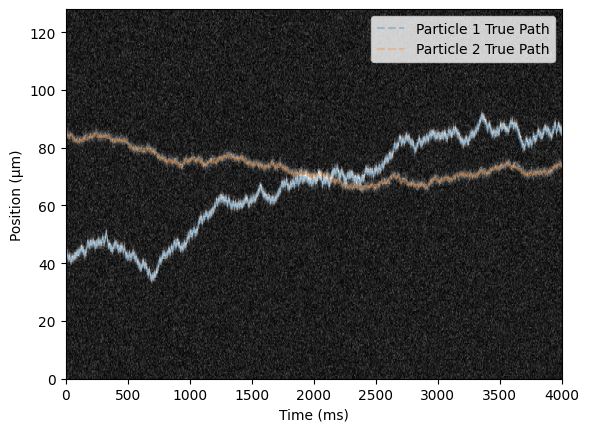

In [3]:
# multiple particles
particle_size_1 = 5  # in nm
particle_size_2 = 20  # in nm
diffusion_coefficient_1 = get_diffusion_coefficient(particle_size_1)
diffusion_coefficient_2 = get_diffusion_coefficient(particle_size_2)
kymograph_noisy, kymograph_gt, true_path = generate_kymograph(length=4000, width=256, 
                                                              diffusion=[diffusion_coefficient_1, diffusion_coefficient_2],
                                                              contrast=[1.0, 0.5], 
                                                              noise_level=0.3, peak_width=1, dx=x_step, dt=t_step)

print(f"Estimated particle radius 1: ??? nm") # your task
print(f"Estimated particle radius 2: ??? nm")

plt.imshow(kymograph_noisy.T, cmap='gray', aspect='auto', extent=[0, kymograph_gt.shape[0]*t_step, 0, kymograph_gt.shape[1]*x_step], origin='lower')
for i, path in enumerate(true_path):
    plt.plot(path * x_step, label=f'Particle {i+1} True Path', alpha=0.3, linestyle='--')
plt.xlabel('Time (ms)')
plt.ylabel('Position (µm)')
plt.legend()
plt.show()

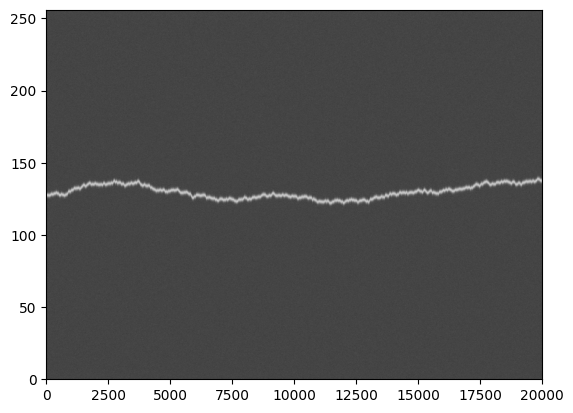

In [8]:
challenge_kymo1 = load_challenge_data(1)
plt.imshow(challenge_kymo1.T, cmap='gray', aspect='auto', extent=[0, challenge_kymo1.shape[0]*t_step, 0, challenge_kymo1.shape[1]*x_step], origin='lower')

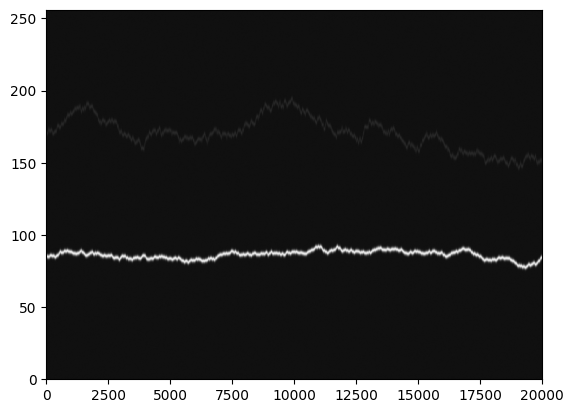

In [9]:
challenge_kymo_multi1 = load_challenge_data_multiple_particles(1)
plt.imshow(challenge_kymo_multi1.T, cmap='gray', aspect='auto', extent=[0, challenge_kymo_multi1.shape[0]*t_step, 0, challenge_kymo_multi1.shape[1]*x_step], origin='lower')